In [28]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/IvanJarquin/Diamonds_price_pred/main/diamonds.csv'
dmd = pd.read_csv(url)

***About Dataset***


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

***Content***

-price price in US dollars (\$326--\$18,823)

-carat weight of the diamond (0.2--5.01)

-cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

-color diamond colour, from J (worst) to D (best)

-clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

-x length in mm (0--10.74)

-y width in mm (0--58.9)

-z depth in mm (0--31.8)

-depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

-table width of top of diamond relative to widest point (43--95)

##Exploratory data analysis

In [29]:
new_colms =["cut","color","clarity","carat","depth","table","x","y","z","price"]
dmd=dmd.reindex(columns=new_colms)
dmd

,cut,color,clarity,carat,depth,table,x,y,z,price
0,Ideal,E,SI2,0.23,61.5,55.0,3.95,3.98,2.43,326
1,Premium,E,SI1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,Good,E,VS1,0.23,56.9,65.0,4.05,4.07,2.31,327
3,Premium,I,VS2,0.29,62.4,58.0,4.20,4.23,2.63,334
4,Good,J,SI2,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
49995,Ideal,D,SI1,0.72,60.8,57.0,5.75,5.76,3.50,2757
49996,Good,D,SI1,0.72,63.1,55.0,5.69,5.75,3.61,2757
49997,Very Good,D,SI1,0.70,62.8,60.0,5.66,5.68,3.56,2757
49998,Premium,H,SI2,0.86,61.0,58.0,6.15,6.12,3.74,2757


In [30]:
dmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      50000 non-null  object 
 1   color    50000 non-null  object 
 2   clarity  50000 non-null  object 
 3   carat    50000 non-null  float64
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   x        50000 non-null  float64
 7   y        50000 non-null  float64
 8   z        50000 non-null  float64
 9   price    50000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder
mask=dmd.dtypes==object
catcols=dmd.columns[mask].tolist()
le=LabelEncoder()
dmd[catcols] = dmd[catcols].apply(lambda col: le.fit_transform(col))
dmd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cut,50000.0,2.553340,1.028113,0.0,2.00,2.00,3.00,4.00
color,50000.0,2.598780,1.700418,0.0,1.00,3.00,4.00,6.00
clarity,50000.0,3.836540,1.723183,0.0,2.00,4.00,5.00,7.00
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00


<Axes: >

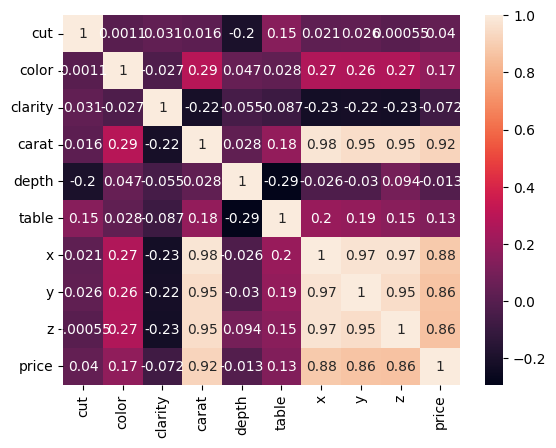

In [32]:
import seaborn as sns
col_mtrx=dmd.corr()
sns.heatmap(data=col_mtrx, annot=True)

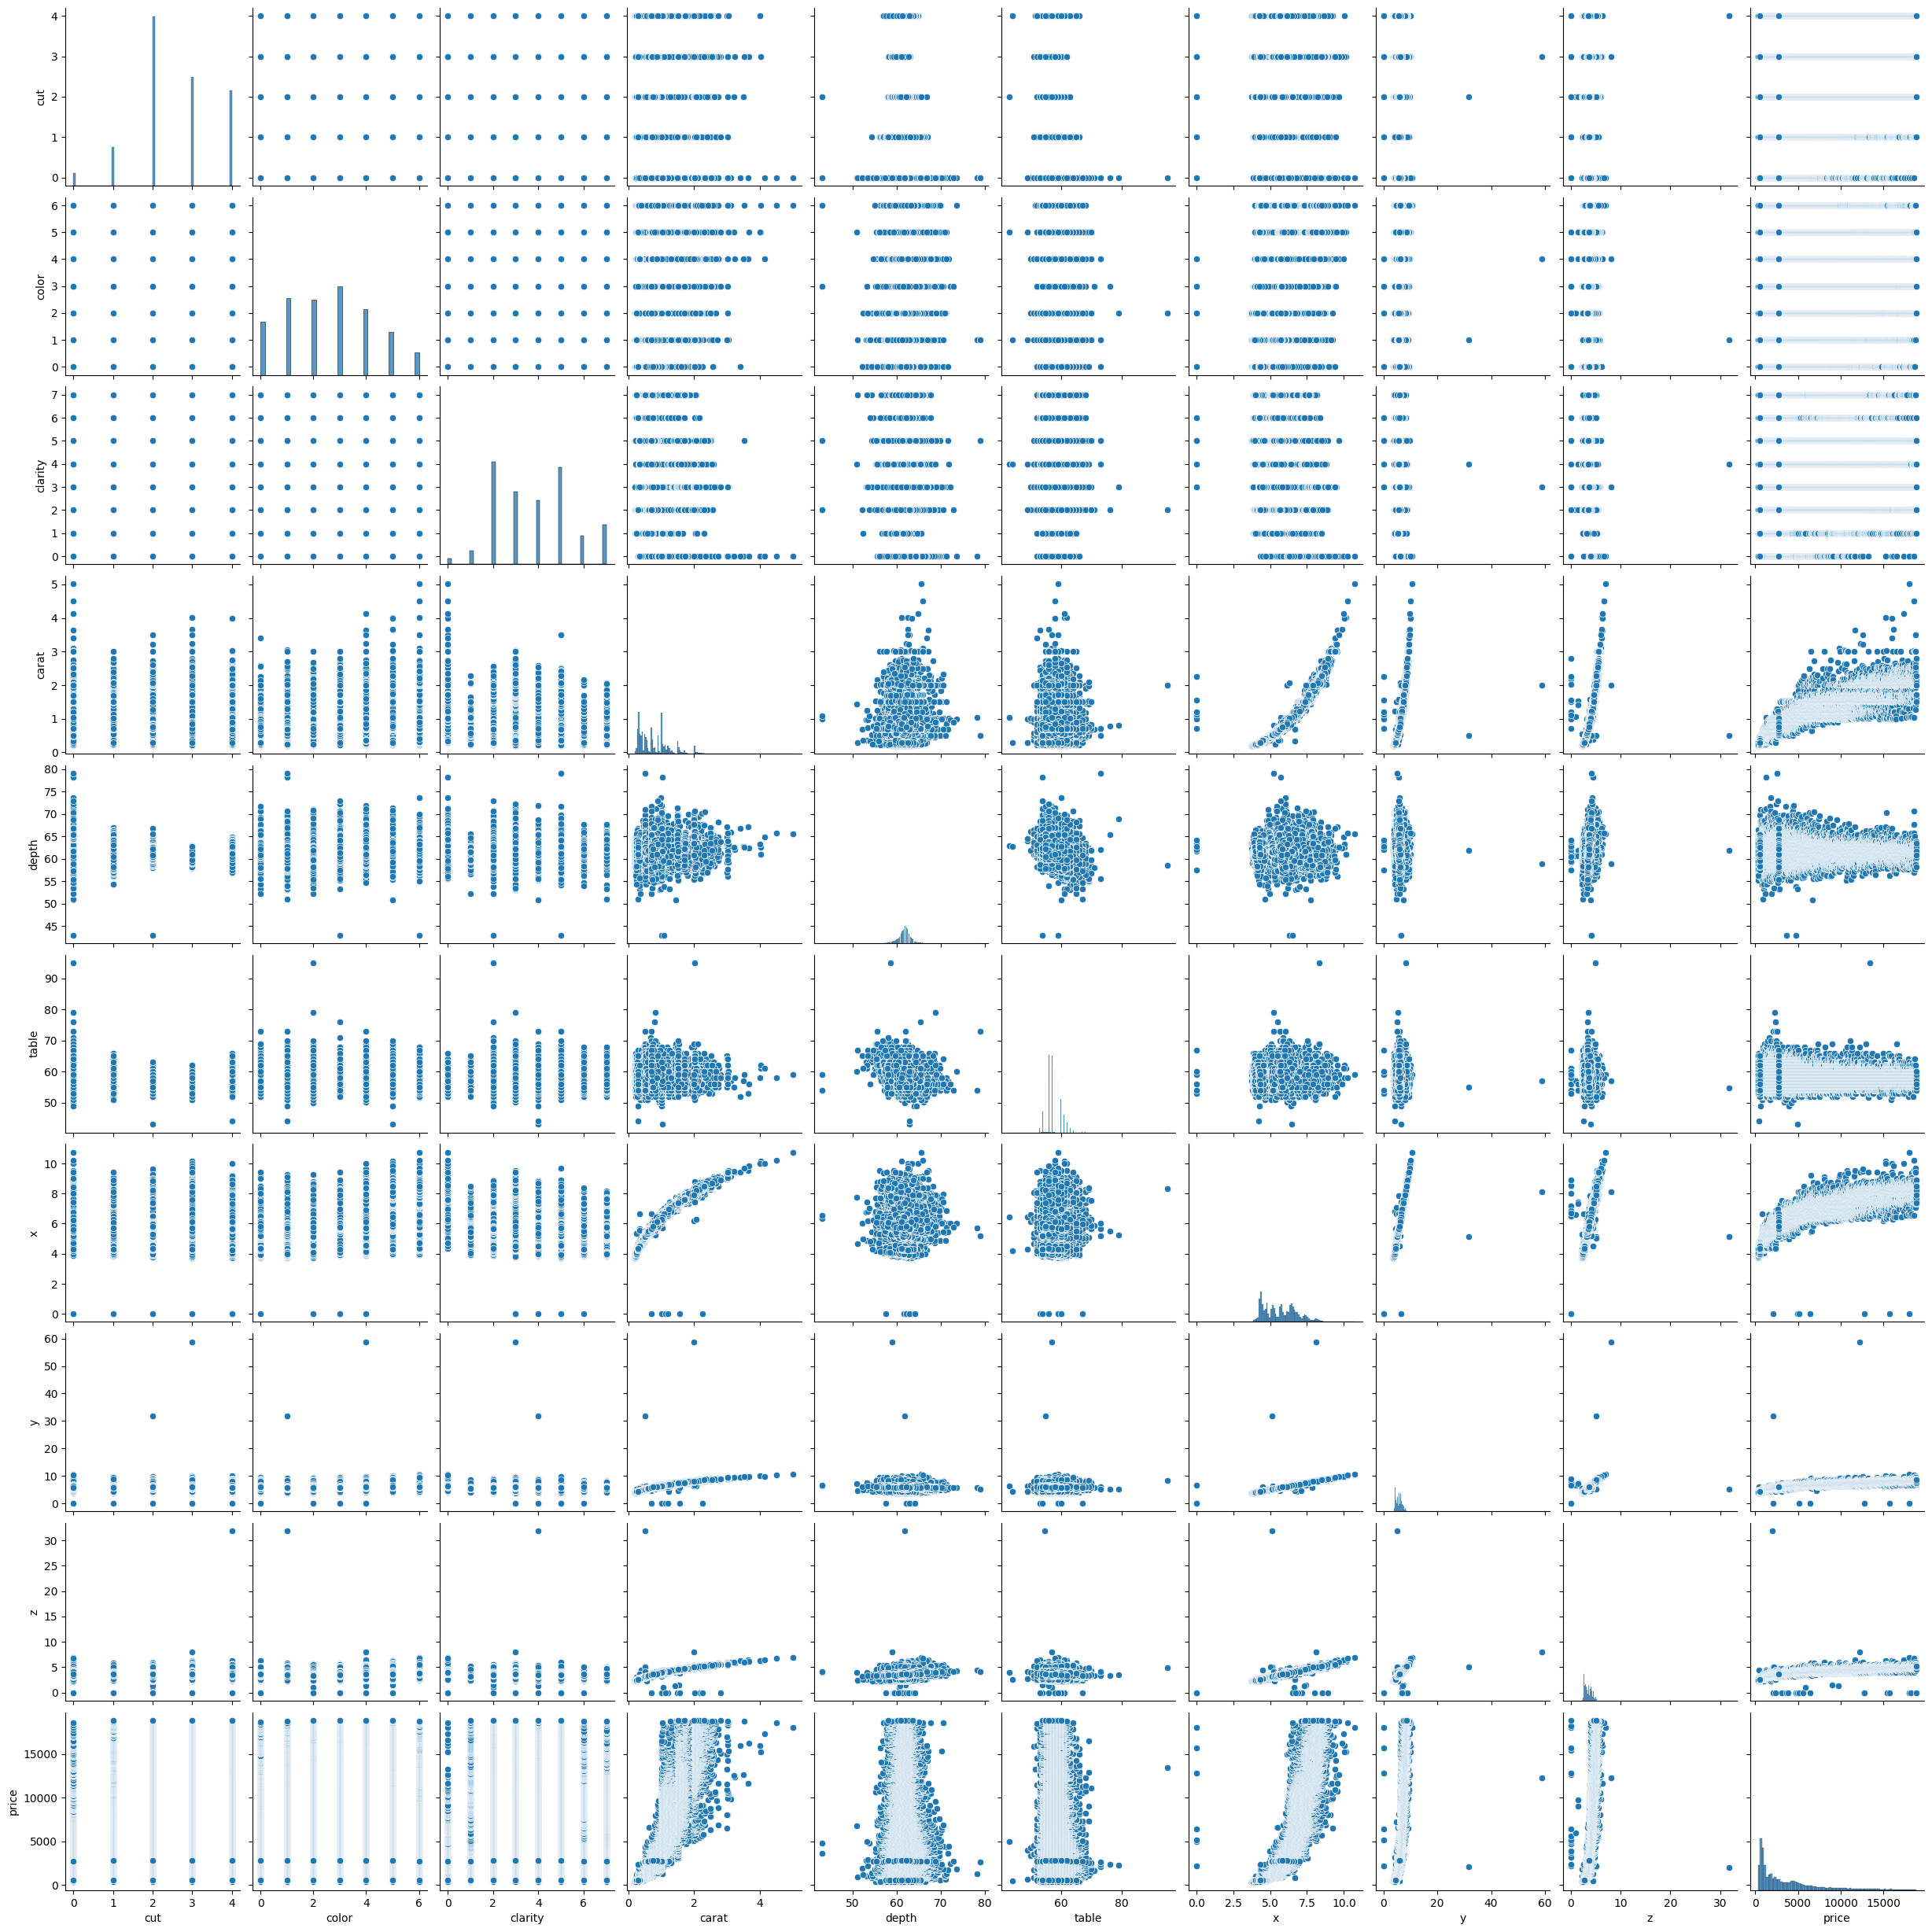

In [33]:
sns.pairplot(dmd)

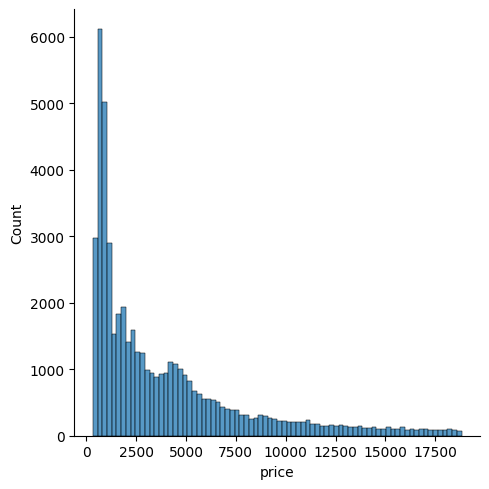

In [34]:
#@markdown ###As we can se in this pairplot and the correlation matrix, x, y, z and carat are the most positive correlated features in the dataset, so let's have a closer look to this variables
sns.displot(data = dmd, x = "price")

<Axes: xlabel='price', ylabel='x'>

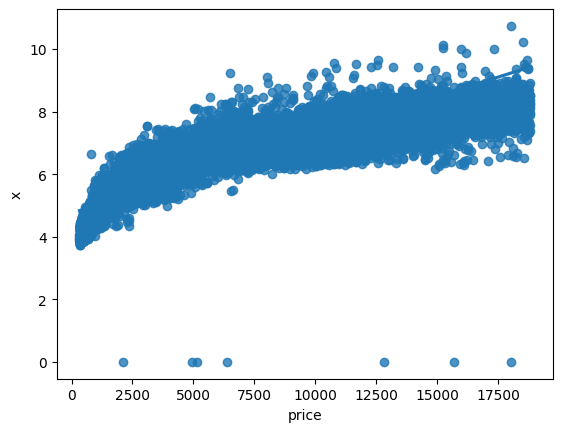

In [35]:
sns.regplot(data=dmd, x="price", y="x")

<Axes: xlabel='price', ylabel='y'>

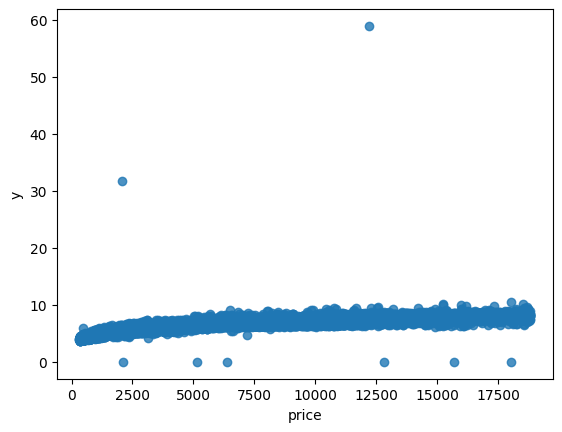

In [36]:
sns.regplot(data=dmd, x="price", y="y")

<Axes: xlabel='price', ylabel='z'>

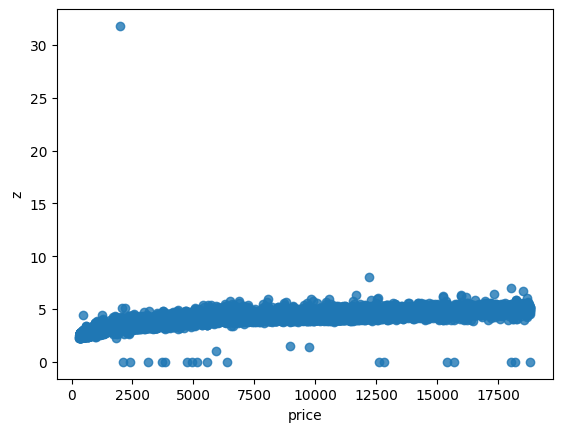

In [37]:
sns.regplot(data=dmd, x="price", y="z")

<Axes: xlabel='price', ylabel='carat'>

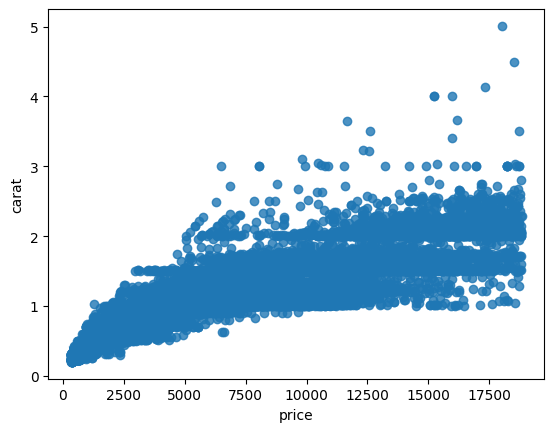

In [38]:
sns.regplot(data=dmd, x="price", y="carat")

# Data preprocessing

In [39]:
#Our data has been encoded for the purpuse of data visualization
#so we will proceed to skip that step and we are going to eliminate the outliers in our features

#Dropping all the dimentionless values
dmd=dmd.drop(dmd[dmd["x"]==0].index)
dmd=dmd.drop(dmd[dmd["y"]==0].index)
dmd=dmd.drop(dmd[dmd["z"]==0].index)

#Discriminating all values above 30
dmd=dmd[(dmd["y"]<30)]
dmd=dmd[(dmd["z"]<30)]
dmd.info

<bound method DataFrame.info of        cut  color  clarity  carat  depth  table     x     y     z  price
0        2      1        3   0.23   61.5   55.0  3.95  3.98  2.43    326
1        3      1        2   0.21   59.8   61.0  3.89  3.84  2.31    326
2        1      1        4   0.23   56.9   65.0  4.05  4.07  2.31    327
3        3      5        5   0.29   62.4   58.0  4.20  4.23  2.63    334
4        1      6        3   0.31   63.3   58.0  4.34  4.35  2.75    335
...    ...    ...      ...    ...    ...    ...   ...   ...   ...    ...
49995    2      0        2   0.72   60.8   57.0  5.75  5.76  3.50   2757
49996    1      0        2   0.72   63.1   55.0  5.69  5.75  3.61   2757
49997    4      0        2   0.70   62.8   60.0  5.66  5.68  3.56   2757
49998    3      4        3   0.86   61.0   58.0  6.15  6.12  3.74   2757
49999    2      0        3   0.75   62.2   55.0  5.83  5.87  3.64   2757

[49980 rows x 10 columns]>

In [40]:
X=dmd.iloc[:, :-1].values
Y=dmd.iloc[:, -1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trainsc=scaler.fit_transform(X_train)
X_testsc=scaler.fit_transform(X_test)

#Model Building and Evaluation

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [44]:
#Support Vector regression
from sklearn.svm import SVR
SVR=SVR(kernel = 'rbf')
SVR.fit(X_trainsc, y_train)
pred_svr = SVR.predict(X_testsc)
svr_score = SVR.score(X_testsc, y_test)
svr_mse = mean_squared_error(y_test, pred_svr)
svr_mae = mean_absolute_error(y_test, pred_svr)
svr_Rmse = np.sqrt(mean_absolute_error(y_test, pred_svr))
svr_square = r2_score (y_test, pred_svr)

In [45]:
#Extreme Gradient Boosting
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=42)
xgb.fit(X_trainsc, y_train)
pred_xgb = xgb.predict(X_testsc)
xgb_score=xgb.score(X_testsc, y_test)
xgb_mse = mean_squared_error(y_test, pred_xgb)
xgb_mae = mean_absolute_error(y_test, pred_xgb)
xgb_Rmse = np.sqrt(mean_absolute_error(y_test, pred_xgb))
xgb_square = r2_score (y_test, pred_xgb)

In [46]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_trainsc, y_train)
pred_dtr = DTR.predict(X_testsc)
dtr_score=DTR.score(X_testsc, y_test)
dtr_mse = mean_squared_error(y_test, pred_dtr)
dtr_mae = mean_absolute_error(y_test, pred_dtr)
dtr_Rmse = np.sqrt(mean_absolute_error(y_test, pred_dtr))
dtr_square = r2_score (y_test, pred_dtr)

In [47]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(X_trainsc, y_train)
pred_rfr = RFR.predict(X_testsc)
rfr_score=RFR.score(X_testsc, y_test)
rfr_mse = mean_squared_error(y_test, pred_rfr)
rfr_mae = mean_absolute_error(y_test, pred_rfr)
rfr_Rmse = np.sqrt(mean_absolute_error(y_test, pred_rfr))
rfr_square = r2_score (y_test, pred_rfr)

In [48]:
mods = pd.DataFrame({
    'Model': ['XGboost', 'Decision Tree', 'SVR','Random Forest'],
    'Score': [xgb_score, dtr_score, svr_score,rfr_score]})
mods.sort_values(by='Score', ascending=False)

,Model,Score
0,XGboost,0.980657
3,Random Forest,0.977848
1,Decision Tree,0.964234
2,SVR,0.506082


###The .score Method is used as a generic and fast scoring method(you can use r2_score as well) avalible for all the classifiers in scikitlearn, it returns a value between 0 and 1 in wich 1 it's a perfect predicciotn. As we can see in this notebook, XGBoost it's the most efficient model for regression in this particular case.

In [49]:
mods_met = pd.DataFrame({
    'Model': ['SVR', 'XGBoost', 'Decision Tree','Random Forest'],
    'MSE': [svr_mse, xgb_mse, dtr_mse, rfr_mse],
    'MAE': [svr_mae, xgb_mae, dtr_mae,rfr_mae],
    'RMSE': [svr_Rmse, xgb_Rmse, dtr_Rmse,rfr_Rmse],
    'R2': [svr_square, xgb_square, dtr_square,rfr_square]})
mods_met.sort_values(by='R2', ascending=False)

,Model,MSE,MAE,RMSE,R2
1,XGBoost,3.031656e+05,280.692616,16.753884,0.980657
3,Random Forest,3.472005e+05,292.438636,17.100837,0.977848
2,Decision Tree,5.605624e+05,370.362595,19.244807,0.964234
0,SVR,7.741296e+06,1370.294899,37.017494,0.506082


###For our final evaluation, we are using four of the most popular metrics to measure our regresions. If you want a more information about these, I have written a Medium article [here](https://medium.com/@ivanjarquincort/lets-talk-about-metrics-mse-mae-rmse-r-squared-337e49557ae7). Based on the metrics results, we can conclude that XGboost it's one of the best models for this and many other regression aplications.